## Importing Necessary Libraries

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Train test split
from sklearn.model_selection import train_test_split

# Model
from sklearn.ensemble import RandomForestRegressor

# Visualization
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)}) # Set figure size
import matplotlib.pyplot as plt

# Visualize neural network model structure
from keras.utils import plot_model
from IPython.display import Image

# Deep learning model
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Embedding
from tensorflow.keras.models import Model, load_model
from keras.callbacks import EarlyStopping 
from sklearn.impute import KNNImputer
import re 

## Loading Dataset

In [ ]:
df1 = pd.read_csv("LASI_Subset_10.csv")
df1.head()        
vars_state = 39

In [54]:
import re

def sanitize_column_names(df):
    """
    Sanitizes column names in a pandas DataFrame by replacing non-alphanumeric
    characters with underscores.
    """
    df.columns = [re.sub(r'[^A-Za-z0-9_]', '_', col) for col in df.columns]
    return df

# Example usage:
df1 = sanitize_column_names(df1)

In [55]:
df1.drop(columns=['prim_key'], axis = 1, inplace = True)
df1.head()

,Residence,Living_Arrangement,MPCE_quintile,Age,Ever_attended_school,Marital_Status,Currently_working,Self_rated_health,Hypertension,Diabetes,...,Hospitalized,Total_HealthCare_Expenditure,Habit_initiation_Age,Depression_Status,Oral_Health_Problem_Count,Oral_Functional_Impairment,Dental_Caries,Periodontal_Disease,Oral_Ulcers,Tobacco_user_status
0,1 Rural,Living alone,5 Richest,72,1 Yes,Widowed/Separated/Divorced/Never_Married,No,Poor,Yes,Yes,...,No,15000,22,Depressed,3,Yes,Yes,No,No,Current_User
1,1 Rural,Living with Family,2 Poorer,68,2 No,Currently married/living with a partner,Yes,Good,No,No,...,No,9400,15,Not Depressed,0,Yes,No,No,No,Current_User
2,1 Rural,Living with Family,3 Middle,74,1 Yes,Currently married/living with a partner,No,Fair,No,No,...,No,400,22,Not Depressed,0,Yes,No,No,No,Current_User
3,1 Rural,Living with Family,4 Richer,58,1 Yes,Currently married/living with a partner,Yes,Fair,No,No,...,No,275,35,Not Depressed,2,Yes,Yes,No,No,Current_User
4,1 Rural,Living with Family,3 Middle,75,2 No,Currently married/living with a partner,No,Fair,No,No,...,No,1110,25,Not Depressed,0,Yes,No,No,No,Current_User


In [56]:
print(df1['Tobacco_user_status'].value_counts())

Tobacco_user_status
Current_User        1899
Quit_tobacco_use    1899
Name: count, dtype: int64


In [57]:
df = df1.dropna()

In [58]:
df.head()

,Residence,Living_Arrangement,MPCE_quintile,Age,Ever_attended_school,Marital_Status,Currently_working,Self_rated_health,Hypertension,Diabetes,...,Hospitalized,Total_HealthCare_Expenditure,Habit_initiation_Age,Depression_Status,Oral_Health_Problem_Count,Oral_Functional_Impairment,Dental_Caries,Periodontal_Disease,Oral_Ulcers,Tobacco_user_status
0,1 Rural,Living alone,5 Richest,72,1 Yes,Widowed/Separated/Divorced/Never_Married,No,Poor,Yes,Yes,...,No,15000,22,Depressed,3,Yes,Yes,No,No,Current_User
1,1 Rural,Living with Family,2 Poorer,68,2 No,Currently married/living with a partner,Yes,Good,No,No,...,No,9400,15,Not Depressed,0,Yes,No,No,No,Current_User
2,1 Rural,Living with Family,3 Middle,74,1 Yes,Currently married/living with a partner,No,Fair,No,No,...,No,400,22,Not Depressed,0,Yes,No,No,No,Current_User
3,1 Rural,Living with Family,4 Richer,58,1 Yes,Currently married/living with a partner,Yes,Fair,No,No,...,No,275,35,Not Depressed,2,Yes,Yes,No,No,Current_User
4,1 Rural,Living with Family,3 Middle,75,2 No,Currently married/living with a partner,No,Fair,No,No,...,No,1110,25,Not Depressed,0,Yes,No,No,No,Current_User


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Residence                             3798 non-null   object
 1   Living_Arrangement                    3798 non-null   object
 2   MPCE_quintile                         3798 non-null   object
 3   Age                                   3798 non-null   int64 
 4   Ever_attended_school                  3798 non-null   object
 5   Marital_Status                        3798 non-null   object
 6   Currently_working                     3798 non-null   object
 7   Self_rated_health                     3798 non-null   object
 8   Hypertension                          3798 non-null   object
 9   Diabetes                              3798 non-null   object
 10  Cancer                                3798 non-null   object
 11  Chronic_lung_disease          

## Train Test Split

In [60]:
X = df.copy().drop('Tobacco_user_status', axis=1)

y = df['Tobacco_user_status']

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=vars_state)
X_train,X_val,y_train,y_val = train_test_split(X_1,y_1,test_size=0.2,random_state=42)

print(f'The training dataset has {X_train.shape[0]} records and {X_train.shape[1]} columns.')
print(f'The testing dataset has {len(X_test)} records.')  

X.head()

The training dataset has 2430 records and 35 columns.
The testing dataset has 760 records.


,Residence,Living_Arrangement,MPCE_quintile,Age,Ever_attended_school,Marital_Status,Currently_working,Self_rated_health,Hypertension,Diabetes,...,Gender,Hospitalized,Total_HealthCare_Expenditure,Habit_initiation_Age,Depression_Status,Oral_Health_Problem_Count,Oral_Functional_Impairment,Dental_Caries,Periodontal_Disease,Oral_Ulcers
0,1 Rural,Living alone,5 Richest,72,1 Yes,Widowed/Separated/Divorced/Never_Married,No,Poor,Yes,Yes,...,Male,No,15000,22,Depressed,3,Yes,Yes,No,No
1,1 Rural,Living with Family,2 Poorer,68,2 No,Currently married/living with a partner,Yes,Good,No,No,...,Male,No,9400,15,Not Depressed,0,Yes,No,No,No
2,1 Rural,Living with Family,3 Middle,74,1 Yes,Currently married/living with a partner,No,Fair,No,No,...,Male,No,400,22,Not Depressed,0,Yes,No,No,No
3,1 Rural,Living with Family,4 Richer,58,1 Yes,Currently married/living with a partner,Yes,Fair,No,No,...,Male,No,275,35,Not Depressed,2,Yes,Yes,No,No
4,1 Rural,Living with Family,3 Middle,75,2 No,Currently married/living with a partner,No,Fair,No,No,...,Male,No,1110,25,Not Depressed,0,Yes,No,No,No


## Defining Categorical Columns

In [61]:
# Assume categorical columns are provided in a list
categorical_columns = ['Residence','Living Arrangement','MPCE quintile','Ever attended school','Marital Status','Currently working','Self rated health','Hypertension','Diabetes','Cancer','Chronic lung disease','Chronic heart diseases','Stroke','Neurological or Psychiatric problems','High cholesterol',' Type of tobacco','Alcohol_ever_user','Consulted_HCP(Doctor)','HCF visit for Preventive checkup','HCF visit for  Regular treatment','HCF visit for Sickness','HCF visit for Injury/Violence','Covered with health insurance','Gender','Hospitalized','Depression_Status','Oral Functional Impairment','Dental Caries','Periodontal Disease','Oral Ulcers']  # Example categorical columns

In [62]:
categorical_columns = [re.sub(r'[^A-Za-z0-9_]', '_', col) for col in categorical_columns]

In [63]:
categorical_columns

['Residence',
 'Living_Arrangement',
 'MPCE_quintile',
 'Ever_attended_school',
 'Marital_Status',
 'Currently_working',
 'Self_rated_health',
 'Hypertension',
 'Diabetes',
 'Cancer',
 'Chronic_lung_disease',
 'Chronic_heart_diseases',
 'Stroke',
 'Neurological_or_Psychiatric_problems',
 'High_cholesterol',
 '_Type_of_tobacco',
 'Alcohol_ever_user',
 'Consulted_HCP_Doctor_',
 'HCF_visit_for_Preventive_checkup',
 'HCF_visit_for__Regular_treatment',
 'HCF_visit_for_Sickness',
 'HCF_visit_for_Injury_Violence',
 'Covered_with_health_insurance',
 'Gender',
 'Hospitalized',
 'Depression_Status',
 'Oral_Functional_Impairment',
 'Dental_Caries',
 'Periodontal_Disease',
 'Oral_Ulcers']

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Reshape
import numpy as np

# Dictionary to store categorical encoders
cat_encoders = {}
embeddings = {}

# Loop through each categorical column
for idx, col in enumerate(categorical_columns, start=1):
    # Create a unique encoder dictionary
    unique_values = np.unique(X_train[col])
    cat_encoders[col] = {val: i for i, val in enumerate(unique_values)}
    
    # Map categorical values to encoded values
    globals()[f"input_list_train_{idx}"] = X_train[col].map(cat_encoders[col]).values
    globals()[f"input_list_val_{idx}"] = X_val[col].map(cat_encoders[col]).values
    
    # Define input layer for Keras model
    globals()[f"input_cat_{idx}"] = Input(shape=(1,), name=f"input_{col}")
    
    # Define embedding dimension (set to 1 for our experiments, but can be adjusted)
    emb_dim = 1
    
    # Create embedding layer
    globals()[f"embedding_layer_{idx}"] = Embedding(input_dim=len(unique_values), output_dim=emb_dim, name=f"embedding_{col}")(globals()[f"input_cat_{idx}"])
    globals()[f"embedding_layer_{idx}"] = Reshape(target_shape=(emb_dim,))(globals()[f"embedding_layer_{idx}"])
    
    # Store the embedding layer
    embeddings[col] = globals()[f"embedding_layer_{idx}"]
    
    # Print information
    print(f"Processed {col}: {len(unique_values)} unique values")


Processed Residence: 2 unique values
Processed Living_Arrangement: 3 unique values
Processed MPCE_quintile: 5 unique values
Processed Ever_attended_school: 2 unique values
Processed Marital_Status: 2 unique values
Processed Currently_working: 2 unique values
Processed Self_rated_health: 5 unique values
Processed Hypertension: 2 unique values
Processed Diabetes: 2 unique values
Processed Cancer: 2 unique values
Processed Chronic_lung_disease: 2 unique values
Processed Chronic_heart_diseases: 2 unique values
Processed Stroke: 2 unique values
Processed Neurological_or_Psychiatric_problems: 2 unique values
Processed High_cholesterol: 2 unique values
Processed _Type_of_tobacco: 3 unique values
Processed Alcohol_ever_user: 2 unique values
Processed Consulted_HCP_Doctor_: 2 unique values
Processed HCF_visit_for_Preventive_checkup: 2 unique values
Processed HCF_visit_for__Regular_treatment: 2 unique values
Processed HCF_visit_for_Sickness: 2 unique values
Processed HCF_visit_for_Injury_Violenc

In [65]:
numeric_cols = ['Age','Number_of_OPD_visits','Total_HealthCare_Expenditure','Habit_initiation_Age','Oral_Health_Problem_Count']

# Print the updated list
print(numeric_cols)

['Age', 'Number_of_OPD_visits', 'Total_HealthCare_Expenditure', 'Habit_initiation_Age', 'Oral_Health_Problem_Count']


In [66]:
input_list_train = []

# Append each list to the common list using a loop
for i in range(1, 31):  # Assuming 30 categorical columns
    input_list_train.append(globals()[f"input_list_train_{i}"])

# Append numerical values to the training and testing list
input_list_train.append(X_train[numeric_cols].values)

In [ ]:
for i, arr in enumerate(input_list_train):
    if hasattr(arr, "shape"):
        print(f"Input {i} shape: {arr.shape}")
    else:
        print(f"Input {i} is of type {type(arr)} and has length {len(arr)}")


In [68]:
input_list_val = []

# Append each list to the common list using a loop
for i in range(1,31 ):  # Assuming 22 categorical columns
    input_list_val.append(globals()[f"input_list_val_{i}"])

# Append numerical values to the training and testing list
input_list_val.append(X_val[numeric_cols].values)

In [69]:
# Input dimension of the numeric variables
input_numeric = Input(shape=(len(numeric_cols),))

# Output dimension of the numeric variables
emb_numeric = input_numeric

# Take a look at the output dimension
emb_numeric

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'input_2')>

In [ ]:
input_data = []

for i in range(1, 31):  # Looping from 1 to 22 for categorical inputs
    input_data.append(globals()[f"input_cat_{i}"])

input_data.append(input_numeric)

input_data

In [ ]:
emb_data = []

for i in range(1, 31):  # Looping from 1 to 22 for categorical inputs
    emb_data.append(globals()[f"embedding_layer_{i}"])

emb_data.append(emb_numeric)

emb_data

In [72]:
# Concatenate layer concatenates a list of inputs
model_data = Concatenate()(emb_data)
model_data

<KerasTensor: shape=(None, 35) dtype=float32 (created by layer 'concatenate_1')>

## Loading the Model

In [73]:
# Dense layer with 25 neurons and relu activation function
model = Dense(25, activation = 'relu')(model_data)
# Dense layer with 15 neurons and relu activation function
model = Dense(15, activation = 'relu')(model)
# Dense layer with 10 neurons and relu activation function
model = Dense(10, activation = 'relu')(model)
# Dense layer with 1 neurons and relu activation function
outputs = Dense(1, activation = 'sigmoid')(model)

# Use Model to group layers into an object with training and inference features
nn = Model(inputs=input_data, outputs=outputs, name ='Entity_embedding_model_keras')

# Print out the model summary
nn.summary()

Model: "Entity_embedding_model_keras"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_Residence (InputLaye  [(None, 1)]                  0         []                            
 r)                                                                                               
                                                                                                  
 input_Living_Arrangement (  [(None, 1)]                  0         []                            
 InputLayer)                                                                                      
                                                                                                  
 input_MPCE_quintile (Input  [(None, 1)]                  0         []                            
 Layer)                                                                

                                                                                                  
 input_HCF_visit_for_Injury  [(None, 1)]                  0         []                            
 _Violence (InputLayer)                                                                           
                                                                                                  
 input_Covered_with_health_  [(None, 1)]                  0         []                            
 insurance (InputLayer)                                                                           
                                                                                                  
 input_Gender (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 input_Hospitalized (InputL  [(None, 1)]                  0         []                            
 ayer)    

In [74]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train
label_encoder.fit(y_train)

# Transform y_train and y_test
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
import numpy as np
import tensorflow as tf

# Convert all inputs to float32
input_list_train = [np.array(arr, dtype=np.float32) for arr in input_list_train]
input_list_val = [np.array(arr, dtype=np.float32) for arr in input_list_val]

y_train_encoded = np.array(y_train_encoded, dtype=np.float32)
y_val_encoded = np.array(y_val_encoded, dtype=np.float32)

input_list_train

In [ ]:
for i, arr in enumerate(input_list_train):
    if hasattr(arr, "shape"):
        print(f"Input {i} shape: {arr.shape}")
    else:
        print(f"Input {i} is of type {type(arr)} and has length {len(arr)}")


In [77]:
input_list_train = [x.reshape(2430, -1) for x in input_list_train]

In [ ]:

for i, arr in enumerate(input_list_train):
    print(f"Input {i} shape: {arr.shape}")

In [ ]:
for i, arr in enumerate(input_list_val):
    if hasattr(arr, "shape"):
        print(f"Input {i} shape: {arr.shape}")
    else:
        print(f"Input {i} is of type {type(arr)} and has length {len(arr)}")


In [80]:
input_list_val = [x.reshape(608, -1) for x in input_list_val]

In [ ]:
for i, arr in enumerate(input_list_val):
    if hasattr(arr, "shape"):
        print(f"Input {i} shape: {arr.shape}")
    else:
        print(f"Input {i} is of type {type(arr)} and has length {len(arr)}")


## Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the focal loss function
def focal_loss(gamma=6, alpha=0.3):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        y_true = K.cast(y_true, tf.float32)
        alpha_t = y_true * alpha + (K.ones_like(y_true) - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (K.ones_like(y_true) - y_true) * (1 - y_pred)
        fl = - alpha_t * K.pow((K.ones_like(y_true) - p_t), gamma) * K.log(p_t)
        return K.mean(fl)
    return focal_loss_fixed

# Compile the model with focal loss
nn.compile(optimizer=Adam(learning_rate=0.01), loss=focal_loss(), metrics=['accuracy'])

# Set up early stopping
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=100,restore_best_weights=True)

# Fit the model
history = nn.fit(input_list_train,y_train_encoded,validation_data=(input_list_val, y_val_encoded),epochs=500,batch_size=64,verbose=1,callbacks=[es])

## Freezing Learnt Embeddings and Replacing for Sub-Categories in Train and Test Data

In [ ]:
import pandas as pd
import numpy as np

# Dictionary to store embedding mappings
embedding_dicts = {}

# Loop through each categorical column to extract embeddings
for col in categorical_columns:
    # Get embeddings from the trained model
    emb_matrix = nn.get_layer(f'embedding_{col}').get_weights()[0]
    
    # Create a DataFrame with embeddings
    emb_df = pd.DataFrame(emb_matrix).reset_index()
    
    # Add prefix to distinguish embedding values
    emb_df = emb_df.add_prefix(f'{col}_')
    
    # Create mapping from encoded values to embeddings
    embedding_dicts[col] = emb_df[f'{col}_0'].to_dict()

# Function to replace categorical values with embeddings
def replace_with_embeddings(df, cat_encoders, embedding_dicts):
    df = df.copy()
    for col in categorical_columns:
        df[f'{col}_encoded'] = df[col].map(cat_encoders[col])
        df.drop(columns=[col], inplace=True)
        df.rename(columns={f'{col}_encoded': col}, inplace=True)
        df[col] = df[col].map(embedding_dicts[col])
    return df

# Apply function to replace categorical values with embeddings
X_1 = replace_with_embeddings(X_1,cat_encoders,embedding_dicts)
X_test = replace_with_embeddings(X_test, cat_encoders, embedding_dicts)


## Running Downstream Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode target variable
y_1 = y_1.replace({'Current_User': 0, 'Quit_tobacco_use': 1})
y_test = y_test.replace({'Current_User': 0, 'Quit_tobacco_use': 1})

# Ensure target variable is integer type
y_1 = y_1.astype(int)
y_test = y_test.astype(int)

# Train RandomForest
# Hyper parameter - tuning can be done by Grid Search. For simplicity we have presented the default case.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_1, y_1)

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_1, y_1)

# Predictions
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate models
print("RandomForest AUC:", roc_auc_score(y_test, rf_probs))
print("XGBoost AUC:", roc_auc_score(y_test, xgb_probs))

print("\nRandomForest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("\nRandomForest Classification Report:\n", classification_report(y_test, rf_preds))

print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

[08:57:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



RandomForest AUC: 0.7175654992347169
XGBoost AUC: 0.6706650691525096

RandomForest Confusion Matrix:
 [[253 130]
 [124 253]]

RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.67       383
           1       0.66      0.67      0.67       377

    accuracy                           0.67       760
   macro avg       0.67      0.67      0.67       760
weighted avg       0.67      0.67      0.67       760


XGBoost Confusion Matrix:
 [[230 153]
 [138 239]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       383
           1       0.61      0.63      0.62       377

    accuracy                           0.62       760
   macro avg       0.62      0.62      0.62       760
weighted avg       0.62      0.62      0.62       760



## Confusion Matrix

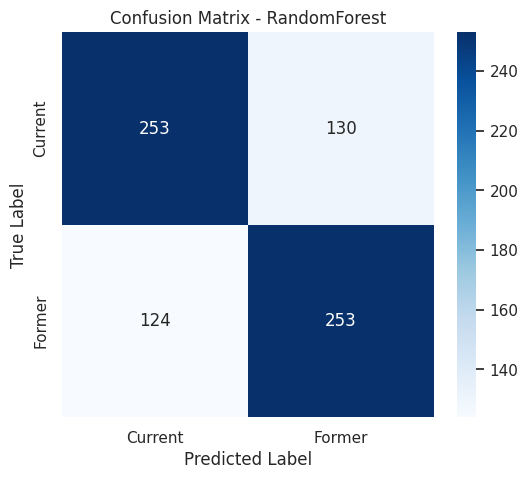

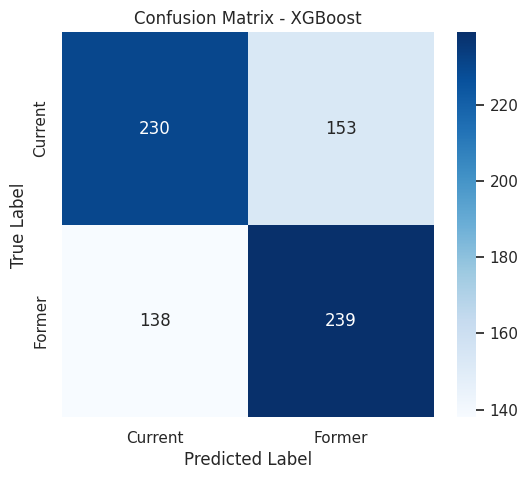

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Current', 'Former'], yticklabels=['Current', 'Former'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrix for RandomForest
plot_confusion_matrix(y_test, rf_preds, "RandomForest")

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, xgb_preds, "XGBoost")

## Embedding Plots

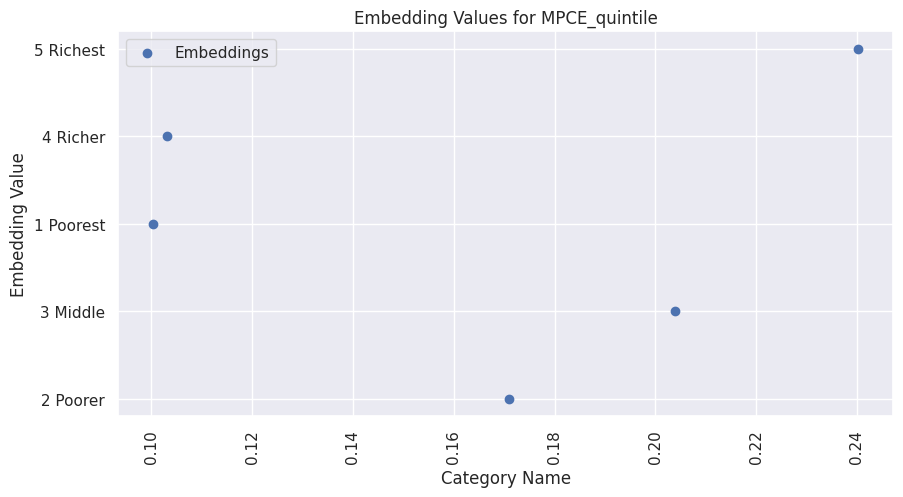

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot embeddings without PCA
def plot_embeddings_simple(column_name, embedding_dicts, cat_encoders):
    # Extract embedding values
    embeddings = np.array(list(embedding_dicts[column_name].values()))
    
    # Retrieve category names
    category_names = list(cat_encoders[column_name].keys())

    # Plot embeddings
    plt.figure(figsize=(10, 5))
    plt.scatter(embeddings,category_names, color='b', label="Embeddings")
    plt.xticks(rotation=90)  # Rotate labels for readability
    plt.xlabel("Category Name")
    plt.ylabel("Embedding Value")
    plt.title(f"Embedding Values for {column_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Plot embeddings for "occupation"
plot_embeddings_simple("MPCE_quintile", embedding_dicts, cat_encoders)


In [ ]:
import shap

# Initialize SHAP explainers
rf_explainer = shap.TreeExplainer(rf_model)
xgb_explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values
rf_shap_values = rf_explainer.shap_values(X_test)
xgb_shap_values = xgb_explainer.shap_values(X_test)

## SHAP plots

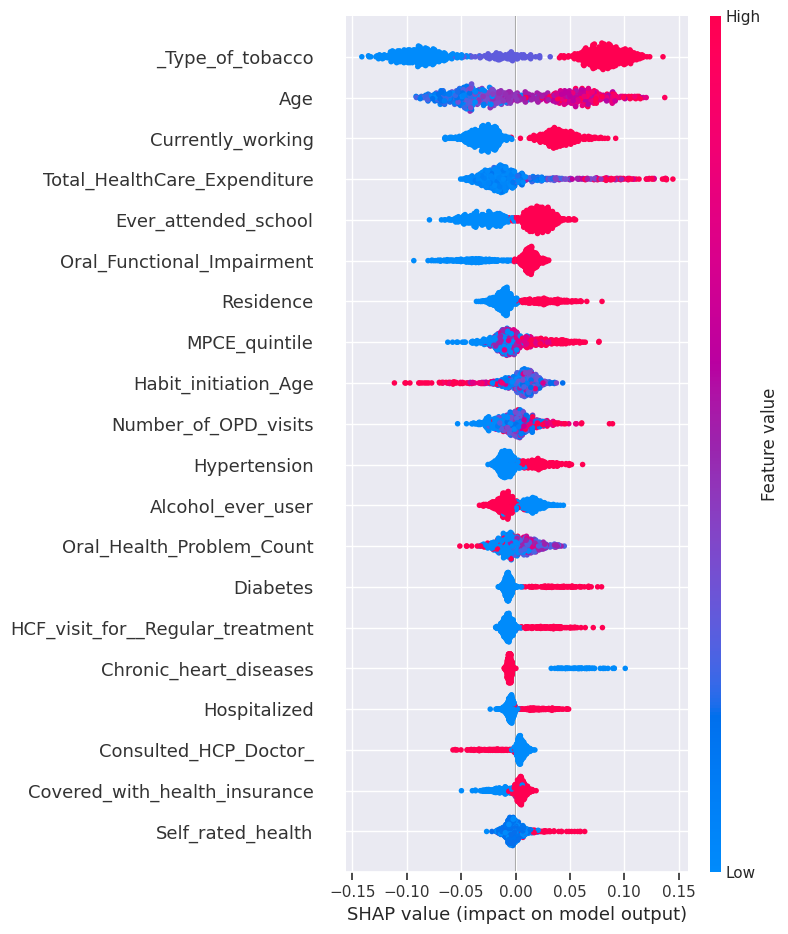

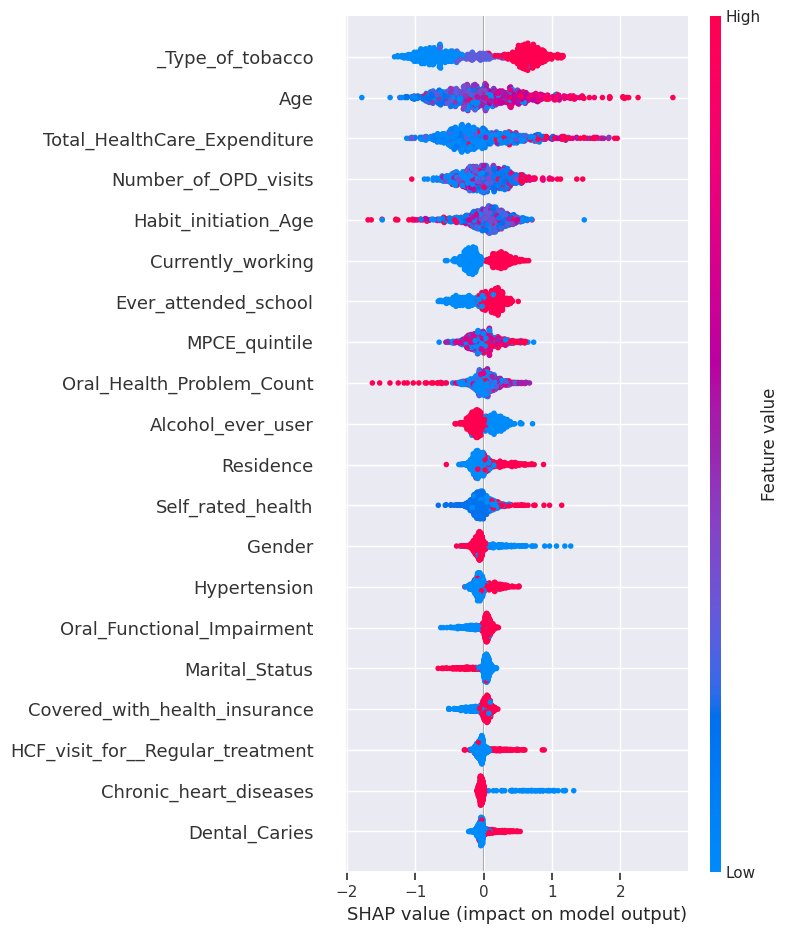

In [94]:
# SHAP summary plot for RandomForest
shap.summary_plot(rf_shap_values[1], X_test)

# SHAP summary plot for XGBoost
shap.summary_plot(xgb_shap_values, X_test)